In [1]:
__author__ = 'xuanzee'
#Guided by Codecademy

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### I. Preview Data

In [3]:
df = pd.read_csv('profiles.csv')

In [4]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [5]:
df = df.rename(columns={'essay0': 'e0_self_summary', 'essay1': 'e1_doing_w_life', 'essay2': 'e2_good_at', 
                        'essay3': 'e3_ppl_notice', 'essay4': 'e4_fav_content', 'essay5': 'e5_six_musts',
                        'essay6': 'e6_time_think', 'essay7': 'e7_fri_nights', 'essay8': 'e8_private_admit',
                        'essay9': 'e9_msg_if'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               59946 non-null  int64  
 1   body_type         54650 non-null  object 
 2   diet              35551 non-null  object 
 3   drinks            56961 non-null  object 
 4   drugs             45866 non-null  object 
 5   education         53318 non-null  object 
 6   e0_self_summary   54458 non-null  object 
 7   e1_doing_w_life   52374 non-null  object 
 8   e2_good_at        50308 non-null  object 
 9   e3_ppl_notice     48470 non-null  object 
 10  e4_fav_content    49409 non-null  object 
 11  e5_six_musts      49096 non-null  object 
 12  e6_time_think     46175 non-null  object 
 13  e7_fri_nights     47495 non-null  object 
 14  e8_private_admit  40721 non-null  object 
 15  e9_msg_if         47343 non-null  object 
 16  ethnicity         54266 non-null  object

### II. Primary Research Question:

Whether zodiac signs can be predicted using other variables from one's profiles.

### III. Explore Data

#### 1. Check the outcome variable of zodiac signs.

In [7]:
print("Number of categories:",df.sign.nunique())
print("Categories:", df.sign.unique())

Number of categories: 48
Categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpi

In [8]:
df['signsCleaned'] = df.sign.str.split().str.get(0)
print('Number of categories:', df.signsCleaned.nunique())
print('Categories:', df.signsCleaned.unique())
df.signsCleaned.value_counts()

Number of categories: 12
Categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

Sign: Fairly evenly distributed, with Leos being the most common and Capricorns being the rarest.

#### 2. Check continuous predictor variables.

In [9]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [10]:
#df.corr(numeric_only=True)

In [11]:
#plt.hist(df['age'], bins=[18,20,30,40,50,60,69])
#sns.histplot(data=df, x='age', binrange=[0,80],binwidth=10, hue='sex')

<Axes: xlabel='age', ylabel='Count'>

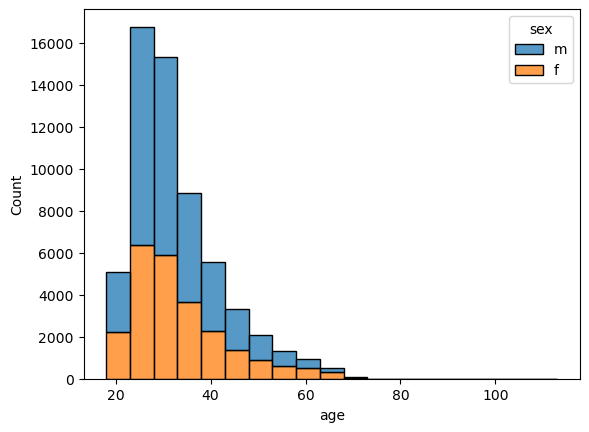

In [12]:
sns.histplot(data=df, x='age', binwidth=5, hue='sex', multiple='stack')

Age: Users are primarily in their late 20s and early 30s, with more males than females in most age groups.

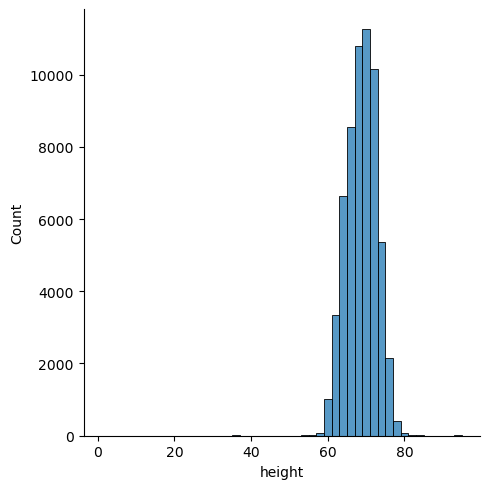

In [13]:
#sns.displot(data=df, x='height', kind='hist')
sns.displot(data=df, x='height', kind='hist', binwidth=2)

Height 1/2: Most users are around 6 feet tall.

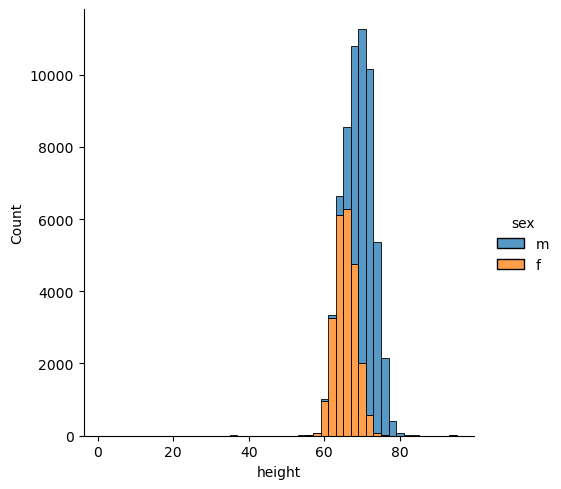

In [14]:
sns.displot(data=df, x='height', kind='hist', binwidth=2, hue='sex', multiple='stack')

Height 2/2: Females are shorter than males.

<Axes: xlabel='income', ylabel='Count'>

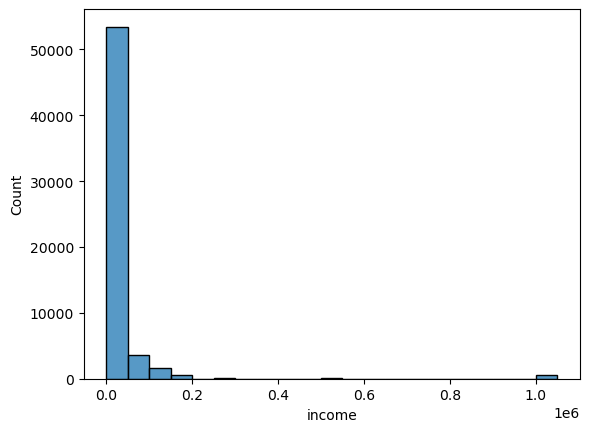

In [15]:
sns.histplot(data=df, x='income', binwidth=50000)

In [16]:
print(len(df[df['income']==-1]))

48442


Income: The majority of users do not report their income.

#### 3. Check discrete predictor variables.

In [17]:
cnt_body_type = df.body_type.value_counts().index

<Axes: xlabel='count', ylabel='body_type'>

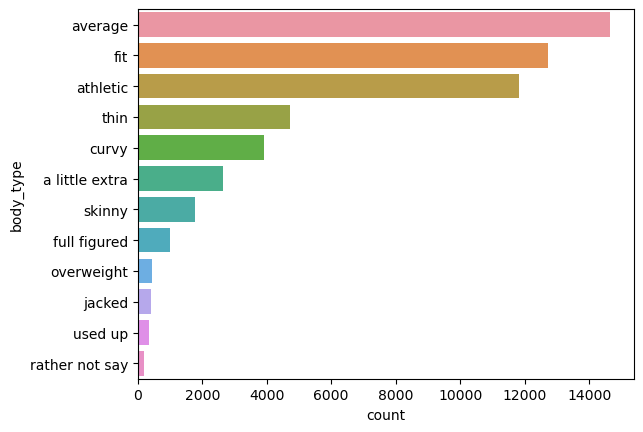

In [18]:
sns.countplot(data=df, y='body_type', order=cnt_body_type)

Body type 1/2: Most people describe themselves as 'average', 'fit', or 'athletic'.

<Axes: xlabel='count', ylabel='body_type'>

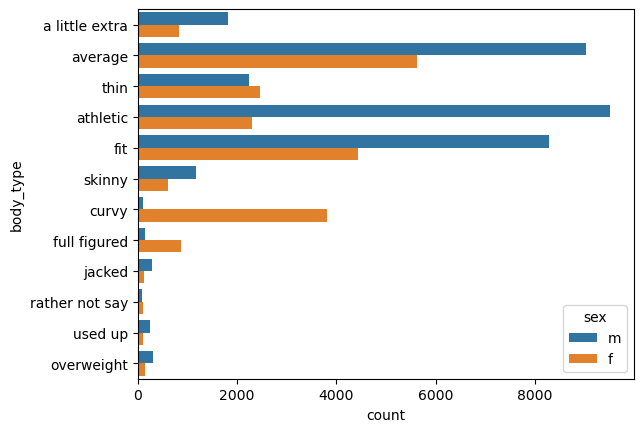

In [19]:
sns.countplot(data=df, y='body_type', hue='sex')

Body type 2/2: People who describe themselves as 'curvy' or 'full figured' tend to be female, and those who claim as 'athletic' are mostly male.

In [20]:
cnt_diet = df.diet.value_counts().index

<Axes: xlabel='count', ylabel='diet'>

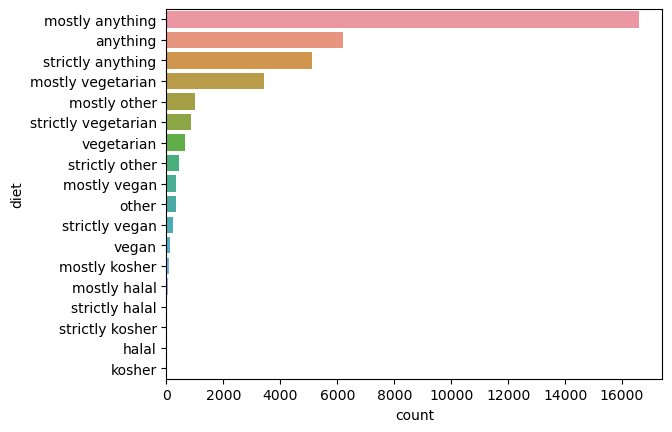

In [21]:
sns.countplot(data=df, y='diet', order=cnt_diet)

Diet: Most people are open to eating anything.

In [22]:
cnt_drinks = df.drinks.value_counts().index

<Axes: xlabel='count', ylabel='drinks'>

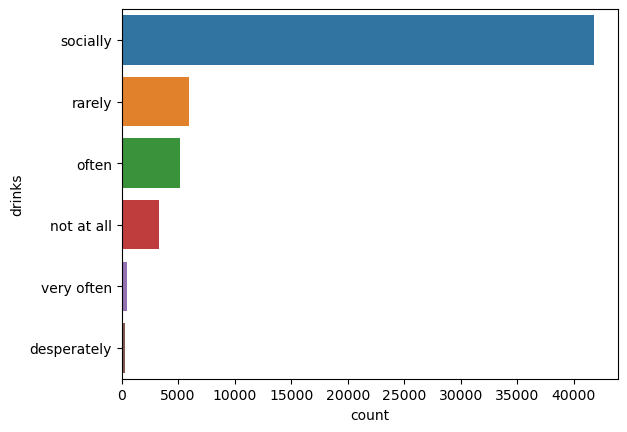

In [23]:
sns.countplot(data=df, y='drinks', order=cnt_drinks)

Drinks: The majority of people drink "socially".

In [24]:
cnt_drugs = df.drugs.value_counts().index

<Axes: xlabel='count', ylabel='drugs'>

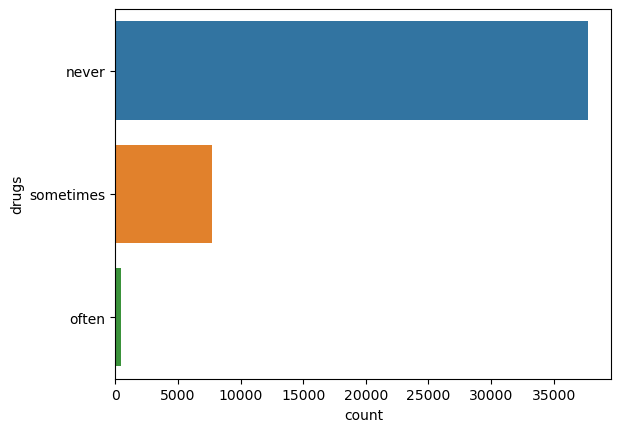

In [25]:
sns.countplot(data=df, y='drugs', order=cnt_drugs)

Drugs: The majority of people "never" use drugs.

In [26]:
cnt_edu = df.education.value_counts().index

<Axes: xlabel='count', ylabel='education'>

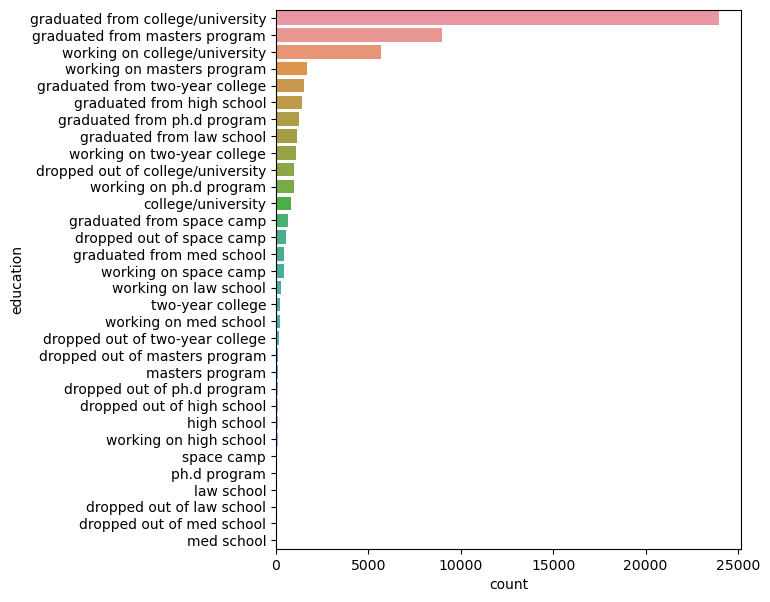

In [27]:
plt.figure(figsize=(6,7))
sns.countplot(data=df, y='education', order=cnt_edu)

Education: The majority of people have education of college and above.

In [28]:
df.ethnicity.value_counts()

white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: ethnicity, Length: 217, dtype: int64

Ethnicity: Too many racial profile combinations, although the majority of users are white, followed by Asians.

In [29]:
cnt_job = df.job.value_counts().index

<Axes: xlabel='count', ylabel='job'>

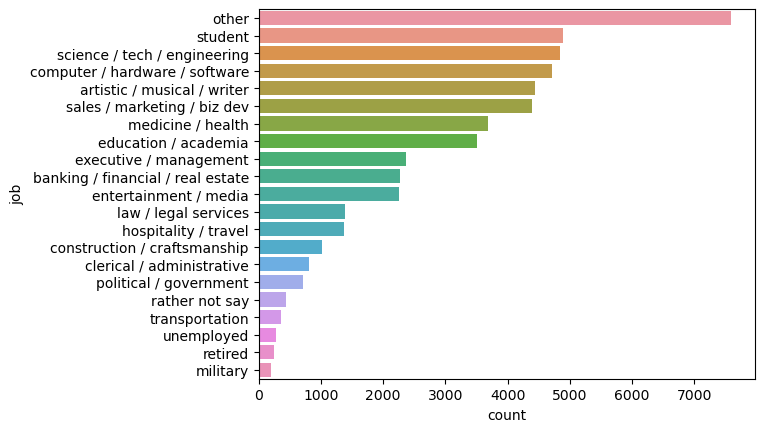

In [30]:
sns.countplot(data=df, y='job', order=cnt_job)

Job: Most people have jobs not in the provided categories, but among those who fit into the categories, the leading groups are student and people who work in tech, computer, arts, and sales.

In [31]:
cnt_offsp = df.offspring.value_counts().index

<Axes: xlabel='count', ylabel='offspring'>

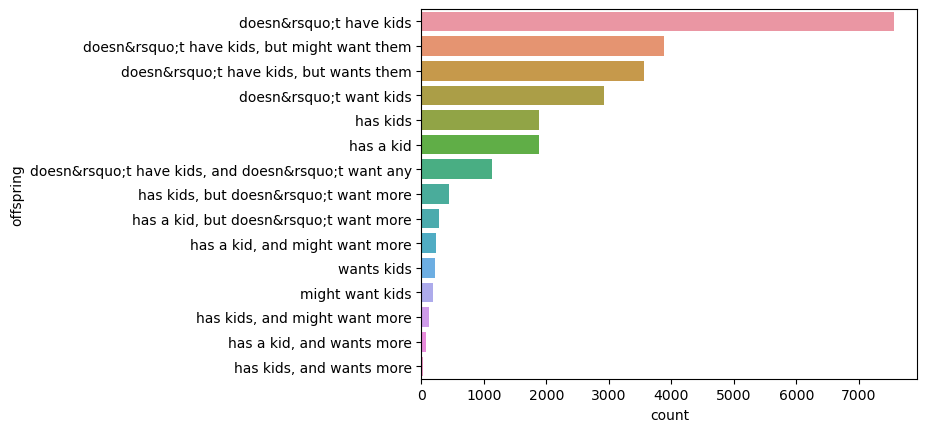

In [32]:
sns.countplot(data=df, y='offspring', order=cnt_offsp)

Offspring: Most users don't have children but are open to having them.

In [33]:
#df.orientation.value_counts()
#contingency_table = pd.crosstab(df['orientation'],df['sex'])
#print(contingency_table)
#contingency_table.plot(kind='bar', stacked=True)
#plt.xticks(rotation=0)

<Axes: xlabel='count', ylabel='orientation'>

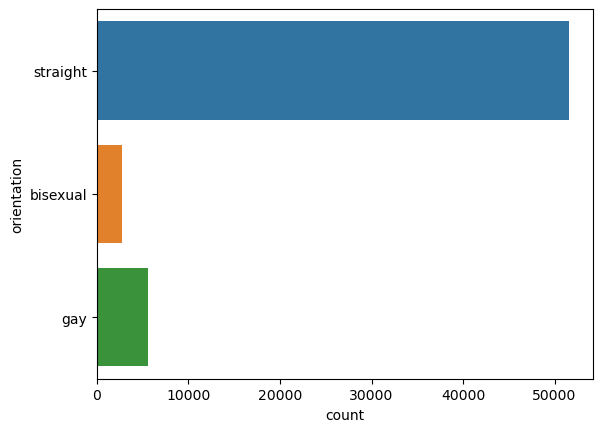

In [34]:
sns.countplot(data=df, y='orientation')

<Axes: xlabel='count', ylabel='orientation'>

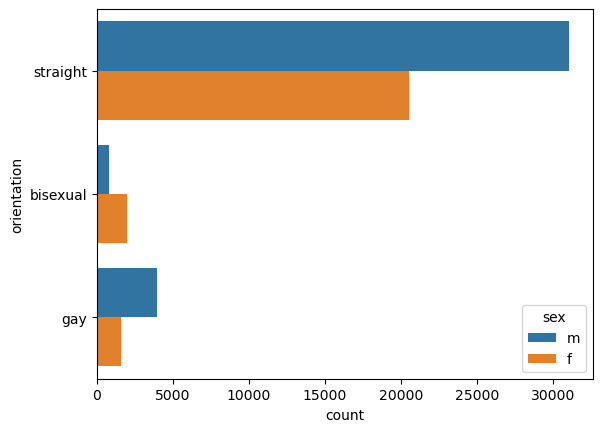

In [35]:
sns.countplot(data=df, y='orientation', hue='sex')

Orientation: The majority of users are straight, with bisexuals more likely being female and gays more likely being male.

In [36]:
cnt_pets = df.pets.value_counts().index

<Axes: xlabel='count', ylabel='pets'>

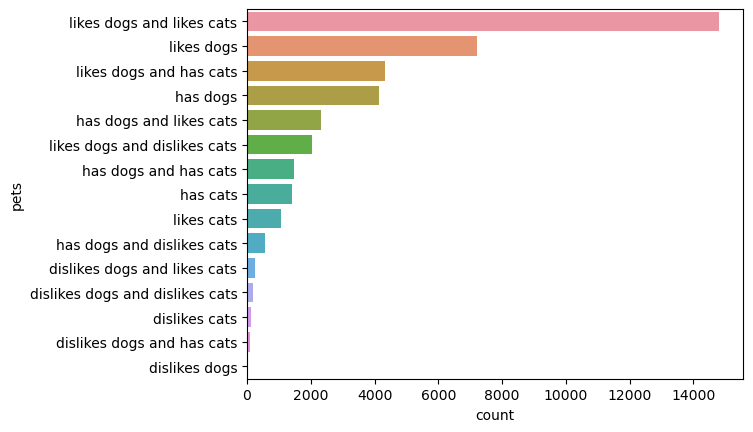

In [37]:
sns.countplot(data=df, y='pets', order=cnt_pets)

Pets: Most people like both dogs and cats.

In [38]:
cnt_rel = df.religion.value_counts().index

<Axes: xlabel='count', ylabel='religion'>

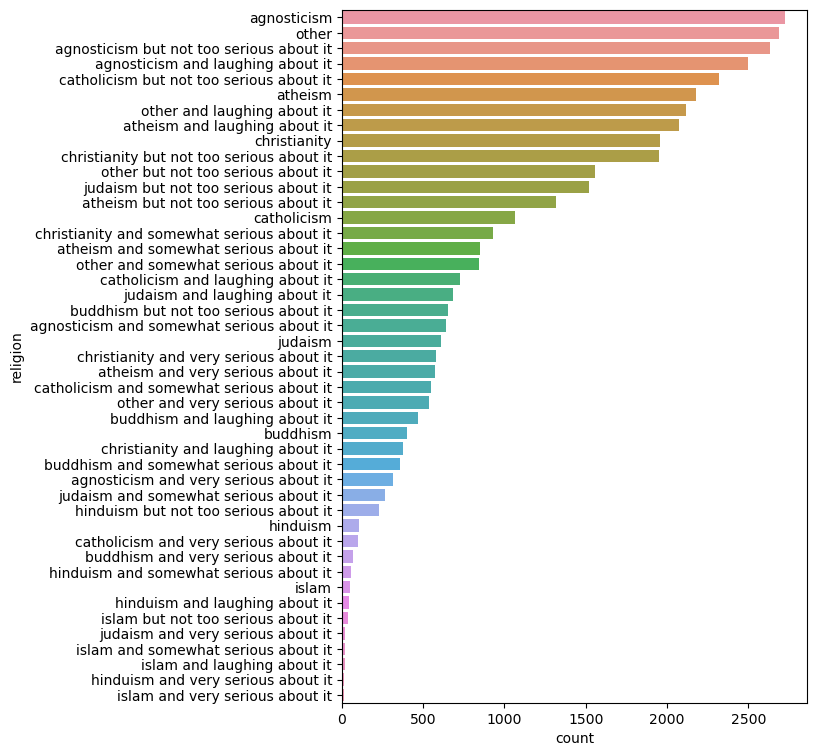

In [39]:
plt.figure(figsize=(6,9))
sns.countplot(data=df, y='religion', order=cnt_rel)

In [40]:
df['religionCleaned'] = df.religion.str.split().str.get(0)

In [41]:
cnt_rel2 = df.religionCleaned.value_counts().index

<Axes: xlabel='count', ylabel='religionCleaned'>

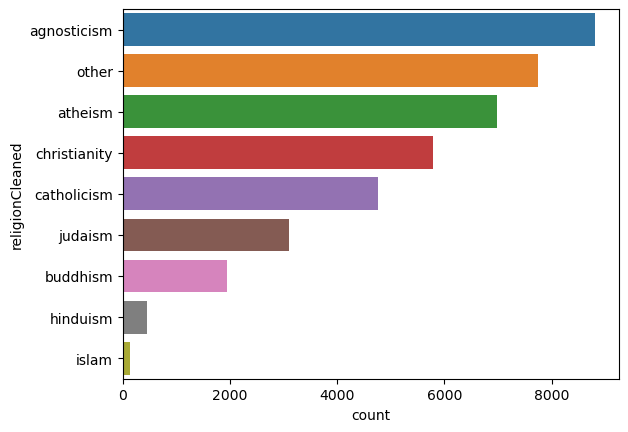

In [42]:
sns.countplot(data=df, y='religionCleaned', order=cnt_rel2)

Religion: Most people are agnostic, with 'other' and 'atheism' being the next most popular choices. The least number of users practice Islam.

In [43]:
df.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

Sex: More males than females in the dataset.

In [44]:
df.smokes.value_counts()

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

Smokes: Most users do not smoke.

In [45]:
df.speaks.value_counts()

english                                                                21828
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: speaks, Length: 7647, dtype: int64

Speaks: Too many different combination of language skills, although the majority of users only speak English.

In [46]:
df.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

Status: The majority of users are single.

### IV. Prepare Data

#### 1. Missing Data

In [47]:
df.isnull().sum()

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
e0_self_summary      5488
e1_doing_w_life      7572
e2_good_at           9638
e3_ppl_notice       11476
e4_fav_content      10537
e5_six_musts        10850
e6_time_think       13771
e7_fri_nights       12451
e8_private_admit    19225
e9_msg_if           12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
signsCleaned        11056
religionCleaned     20226
dtype: int64

In [48]:
cols = ['body_type', 'diet', 'job', 'orientation', 'pets', 'religionCleaned',
       'sex',  'signsCleaned']

In [49]:
df = df[cols].dropna()

In [50]:
df.shape

(16453, 8)

#### 2. Dummy Variables for Categorical Variables

In [51]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns = [col], prefix = col)

In [52]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,religionCleaned_atheism,religionCleaned_buddhism,religionCleaned_catholicism,religionCleaned_christianity,religionCleaned_hinduism,religionCleaned_islam,religionCleaned_judaism,religionCleaned_other,sex_f,sex_m
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,taurus,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,cancer,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


#### 3. Splitting Data

In [53]:
col_length = len(df.columns)

In [54]:
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0]

In [55]:
val_size = 0.25

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=val_size, random_state=0)

In [56]:
Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

### V. Prediction

In [57]:
#Select multi-class models and evaluation tool
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

#### 1. Logistic Regression

In [58]:
lr_model = LogisticRegression(multi_class='multinomial').fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [59]:
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



An accuracy score of 12% is too low here, since a random guess would be 1/12,, or about 8%.

#### 2. K Nearest Neighbor

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [61]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



#### 3. Decision Tree

In [62]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train)
cart_predictions = cart_model.predict(X_train)

In [63]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



Promising accuracy of 78%.

In [64]:
#View the confusion matrix
from sklearn.metrics import confusion_matrix

In [65]:
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

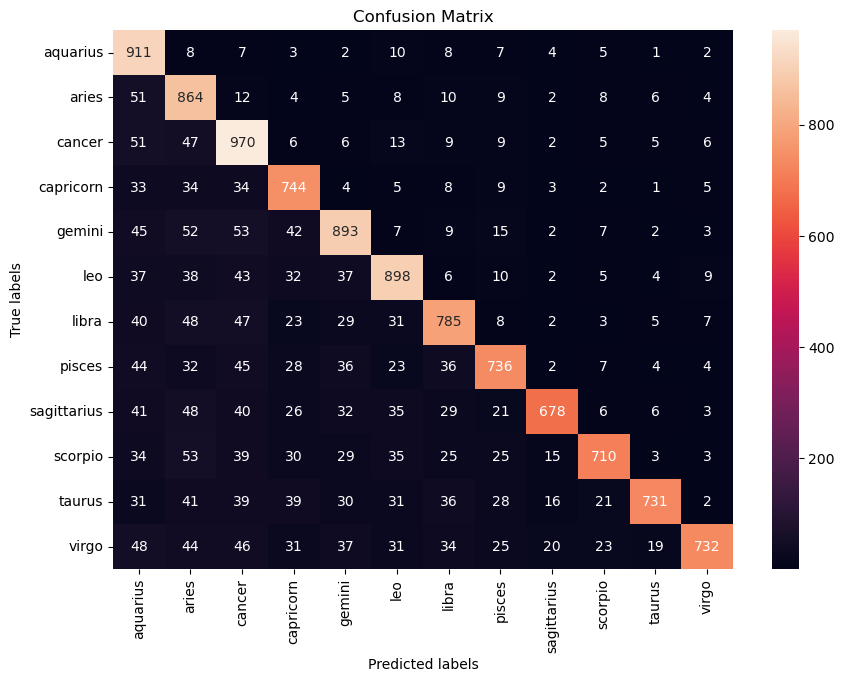

In [66]:
plt.figure(figsize=(10,7))
ax=plt.subplot()
sns.heatmap(cart_cm, annot=True,fmt='d')

ax.set_title('Confusion Matrix')
ax.set_ylabel('True labels')
ax.set_xlabel('Predicted labels')

ax.yaxis.set_ticklabels(cart_labels)
ax.xaxis.set_ticklabels(cart_labels)

ax.yaxis.set_tick_params(labelrotation=0)
ax.xaxis.set_tick_params(labelrotation=90)

In [67]:
#Check for overfitting
cart_model.get_depth()

49

Likely overfitting.

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [69]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

In [70]:
print(results)
print('Baseline: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

[0.08225284 0.09278768 0.09035656 0.10008104 0.08715039]
Baseline: 9.05% (0.59%)


Baseline average accuracy is only ~9%. 

In [71]:
#If limiting the max_depth...
cart_model20 = DecisionTreeClassifier(max_depth=20).fit(X_train, Y_train)
cart_predictions20 = cart_model20.predict(X_train)

In [72]:
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.57      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.42      1129
   capricorn       0.53      0.42      0.47       882
      gemini       0.41      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.29      0.42      0.34      1028
      pisces       0.65      0.34      0.44       997
 sagittarius       0.65      0.33      0.44       965
     scorpio       0.35      0.40      0.37      1001
      taurus       0.53      0.39      0.45      1045
       virgo       0.32      0.40      0.36      1090

    accuracy                           0.41     12339
   macro avg       0.45      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



Accuracy still seems to be better than KNN at 41%.

In [73]:
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print('Baseline: %.2f%% (%.2f%%)' % (results20.mean()*100, results20.std()*100))

[0.08225284 0.09278768 0.09035656 0.10008104 0.08715039]
Baseline: 8.41% (0.34%)


Baseline average accuracy, however, is still very low at ~8%.

#### 4. KNN continued

In [74]:
knn_predictionsTest = knn_model.predict(X_test)
print(classification_report(Y_test, knn_predictionsTest))

              precision    recall  f1-score   support

    aquarius       0.07      0.22      0.11       294
       aries       0.09      0.15      0.11       345
      cancer       0.08      0.13      0.10       328
   capricorn       0.09      0.08      0.09       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.06      0.07       395
       libra       0.10      0.07      0.08       326
      pisces       0.09      0.06      0.07       337
 sagittarius       0.09      0.04      0.05       347
     scorpio       0.10      0.05      0.07       355
      taurus       0.11      0.07      0.08       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



Accuracy now is too low at ~8%.

In [75]:
knn_cm = confusion_matrix(Y_test, knn_predictionsTest)
knn_labels = knn_model.classes_

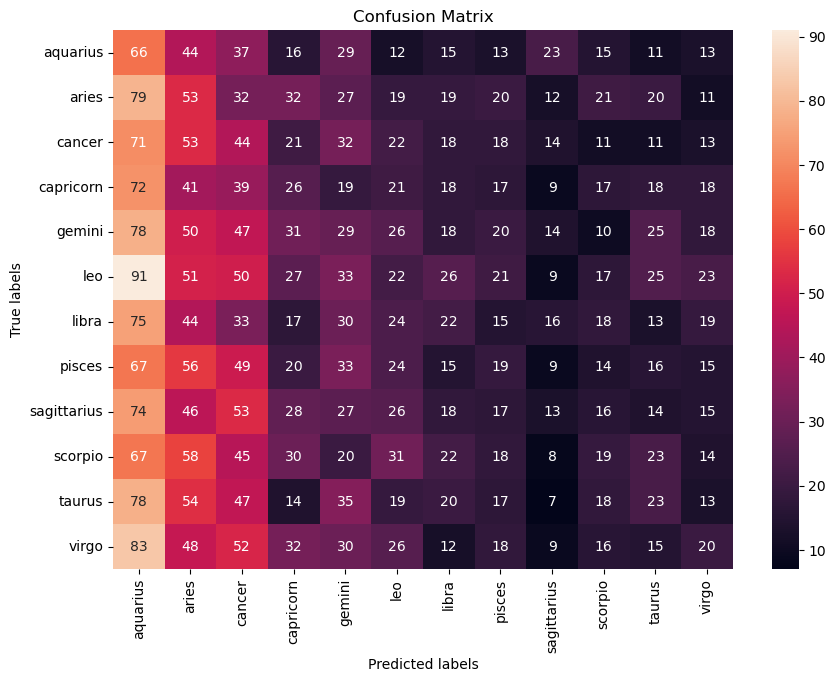

In [76]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(knn_cm, annot=True, fmt='d')

ax.set_title('Confusion Matrix')
ax.set_ylabel('True labels')
ax.set_xlabel('Predicted labels')

ax.yaxis.set_ticklabels(knn_labels)
ax.xaxis.set_ticklabels(knn_labels)

ax.yaxis.set_tick_params(labelrotation=0)
ax.xaxis.set_tick_params(labelrotation=90)

### VI. Conclusion

The final algorithm of KNN is not even better than random guessing. Future studies can try add more models, or fine-tune the hyper parameters of existing models to try increase the predictive power. Otherwise it should be assessed whether predicting users' signs is at all feasible.